# Triangular lattice

DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=73.0219kHz w=1000nm
lattice: lattice shape is square
lattice: Full lattice sizes: [2 1]
lattice: lattice constants: [1.45]w
lattice: dx fixed to: [0.15 0.15 0.36]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[24 20 20] is set.
DVR: R0=[3.725 3.    7.2  ]w is set.
Equalize: scale_factor is not a number. Set to None.
H_op: n=[24 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization starts. Lowest 2 states are to be calculated.
H_op: n=[24 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.24s.
H_solver: eigenstates memory usage:  0.17 MiB.
H_op: n=[24 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian sparse diagonalization starts. Lowest 2 states are to be calculated.
H_op: n=[24 20 20] dx=[0.15 0.1

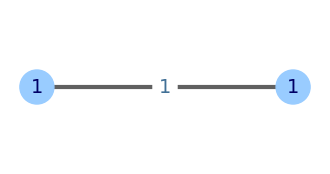

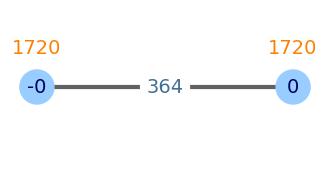

In [17]:
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 20
Lx = 2
Ly = 1
d = 3
shape = 'square'
w = None
eqt = 'neq'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([Lx, Ly], dtype=int),
                 trap=(73.0219, 1000),
                 lc=1450,
                 laser=780,
                 dim=d,
                 shape=shape,
                 waist=w,
                 equalize=False,
                 eqtarget=eqt,
                 sparse=True,
                 symmetry=True,
                 lattice_symmetry=True,
                 verbosity=3)
eig_sol = G.eigen_basis()
E, W, p = eig_sol
E = E[0]
W = W[0]
p = p[0]
R = G.Xmat(W, p)

# In high dimension, X, Y, Z don't commute
# Convert list of ndarray to list of Tensor
solution = riemann_optimize(R)
V = site_order(G, solution, R)

G.A = V.conj().T @ (E[:, None] * V) * G.V0 / G.kHz_2p

# Shift onsite potential to zero average
G.A -= np.mean(np.real(np.diag(G.A))) * \
    np.eye(G.A.shape[0])
G.U = singleband_interaction(G, V, V, W, W, p, p)
G.draw_graph('adjust', A=G.A, U=G.U)
G.draw_graph(A=G.A, U=G.U)

cv = np.sqrt(G.v_cost_func(G.A, None, None))
ct = np.sqrt(G.t_cost_func(G.A, None, None))
cu = np.sqrt(G.u_cost_func(G.U, None, None))
print(f'V = {np.diag(G.A)}')
print(f't = {abs(G.nn_tunneling(G.A))}')
print(f'U = {G.U}')
print(f'V_err = {cv}')
print(f't_err = {ct}')
print(f'U_err = {cu}')


DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=73.2kHz w=1000nm
Triangular lattice size adjust to: [4 2]
lattice: lattice shape is triangular
lattice: Full lattice sizes: [4 2]
lattice: lattice constants: [1.45       1.25573684]w
lattice: dx fixed to: [0.15 0.15 0.36]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[36 24 20] is set.
DVR: R0=[5.5375     3.62786842 7.2       ]w is set.


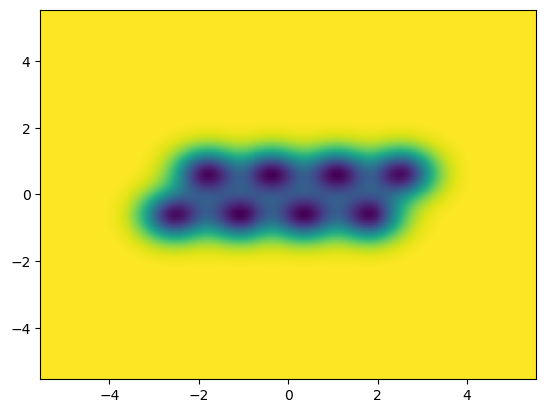

In [21]:
import matplotlib.pyplot as plt
from Hubbard.core import *
import numpy as np
from tools.fix_phase import fix_phase

N = 20
R0 = np.array([3, 3, 7.2])
G = MLWF(N,
         R0=R0,
         lattice=np.array([4, 2], dtype=int),
         lc=1450,
         trap=(73.2, 1000),
         band=1,
         dim=3,
         shape='triangular',
         sparse=True,
         symmetry=True,
         lattice_symmetry=False)

x = np.linspace(-G.R0[0], G.R0[0], 500)
X = np.meshgrid(x, x)
V = G.Vfun(*X, 0)

plt.pcolormesh(*X, V)


Triangular lattice size adjust to: [4 2]
Equalize: scale_factor is not a number. Set to None.
detV = 0.9999999999999996
V = [ 1.11276642 -0.85192834 -0.8999621   0.63912412  0.63912406 -0.89996216
 -0.85192832  1.11276632]
t = [0.2076861  0.27384332 0.32909684 0.12807212 0.807583   0.32909689
 0.60086258 0.63438766 0.27384334 0.60086255 0.8075829  0.20768662
 0.12807232]
U = [0.15382413 1.17647246 1.14434116 1.05144495 1.05144494 1.14434119
 1.17647267 0.15382414]
V_err = 4.459850274329291
t_err = 0.5361225062179189
U_err = 0.4794406784240885


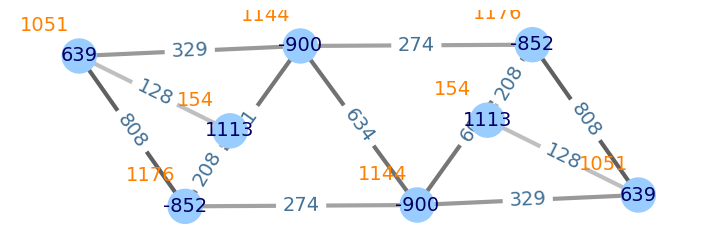

In [3]:
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 16
Lx = 4
Ly = 2
d = 3
shape = 'triangular'
w = None
eqt = 'neq'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([Lx, Ly], dtype=int),
                 trap=(73.0219, 1000),
                 lc=1450,
                 laser=780,
                 dim=d,
                 shape=shape,
                 waist=w,
                 equalize=False,
                 eqtarget=eqt,
                 sparse=True,
                 symmetry=True,
                 lattice_symmetry=False,
                 verbosity=0)
eig_sol = G.eigen_basis()
E, W, p = eig_sol
E = E[0]
W = W[0]
p = p[0]
R = G.Xmat(W, p)

# In high dimension, X, Y, Z don't commute
# Convert list of ndarray to list of Tensor
solution = riemann_optimize(R)
V = site_order(G, solution, R)
G.wf_centers = np.array([np.diag(V.conj().T @ R[i] @ V) / G.lc[i]
                                   for i in range(G.lattice_dim)]).T
print('detV =', la.det(V))
G.A = V.conj().T @ (E[:, None] * V) * G.V0 / G.kHz_2p

# Shift onsite potential to zero average
G.A -= np.mean(np.real(np.diag(G.A))) * \
    np.eye(G.A.shape[0])
G.U = singleband_interaction(G, V, V, W, W, p, p)
G.draw_graph(A=G.A, U=G.U)

cv = np.sqrt(G.v_cost_func(G.A, None, None))
ct = np.sqrt(G.t_cost_func(G.A, None, None))
cu = np.sqrt(G.u_cost_func(G.U, None, None))
print(f'V = {np.diag(G.A)}')
print(f't = {abs(G.nn_tunneling(G.A))}')
print(f'U = {G.U}')
print(f'V_err = {cv}')
print(f't_err = {ct}')
print(f'U_err = {cu}')


Inner product of eigenbasis shows that they are orthogonal:

In [19]:
Wmat = np.array(W).reshape(G.Nsite, -1).T
Wmat.T @ Wmat


array([[ 1.00000000e+00, -3.24873714e-16, -7.50550639e-16,
        -4.92563130e-16, -2.92549065e-16,  8.57195599e-17,
        -1.74431143e-16,  1.30747840e-16],
       [-3.24873714e-16,  1.00000000e+00, -6.94037015e-16,
         2.03693530e-16, -4.19114032e-16, -5.11289155e-16,
         1.04409451e-16, -5.92922232e-16],
       [-7.50550639e-16, -6.94037015e-16,  1.00000000e+00,
         9.03015037e-16,  7.71453473e-16,  8.32563781e-16,
         9.80382385e-17,  9.36351005e-16],
       [-4.92563130e-16,  2.03693530e-16,  9.03015037e-16,
         1.00000000e+00,  1.47259403e-15,  4.65984147e-16,
         2.95532136e-17, -4.98791373e-16],
       [-2.92549065e-16, -4.19114032e-16,  7.71453473e-16,
         1.47259403e-15,  1.00000000e+00,  3.19104116e-16,
        -1.28832928e-17,  1.44111422e-15],
       [ 8.57195599e-17, -5.11289155e-16,  8.32563781e-16,
         4.65984147e-16,  3.19104116e-16,  1.00000000e+00,
         4.15418397e-16, -2.70806005e-15],
       [-1.74431143e-16,  1.044094

Wannier function density plots:

Text(0.5, 1.0, '8 Wannier functions total probability density')

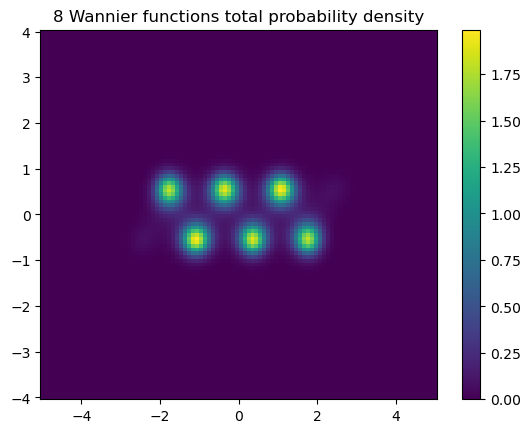

In [21]:
import matplotlib.colors as colors
from tools.fix_phase import fix_phase
import matplotlib.pyplot as plt
x = np.linspace(-5, 5, 100)
y = np.linspace(-4, 4, 100)
z = np.array([0])
wx = wannier_func((x, y, z), V, 
                  G, W, p)


Wx = np.sum(np.reshape(wx, (*wx.shape[:2], G.Nsite))**2, axis=2)
X = np.meshgrid(x, y, indexing='ij')
plt.pcolormesh(*X, Wx)
plt.colorbar()
plt.title('8 Wannier functions total probability density')


In [4]:
x = np.array([np.diag(V.T @ R[i] @ V) / G.lc[i]
              for i in range(G.lattice_dim)]).T

plt.plot(x[:, 0], x[:, 1], 'o')
plt.plot(G.trap_centers[:, 0], G.trap_centers[:, 1], 'o')


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 8 is different from 500)

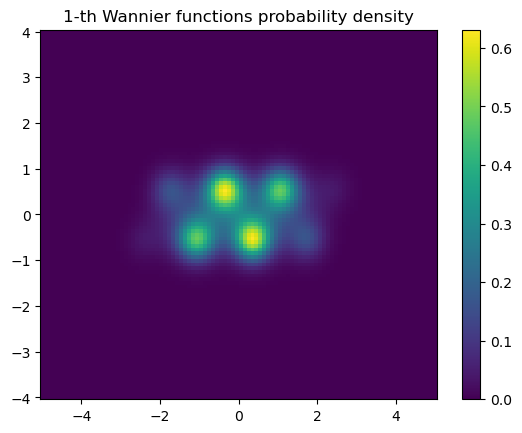

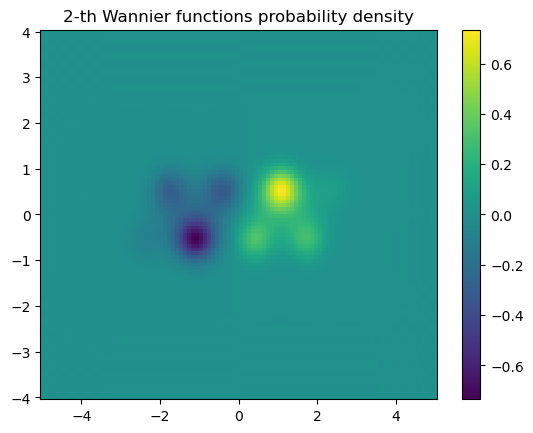

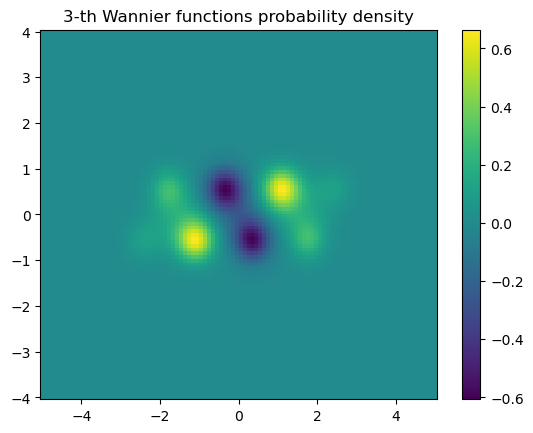

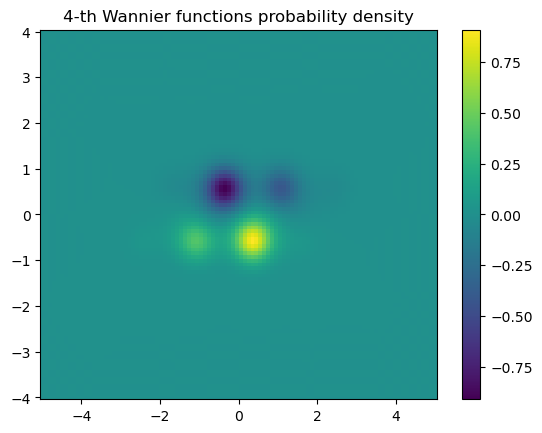

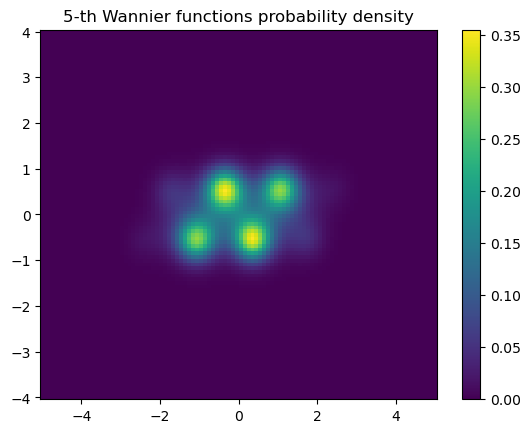

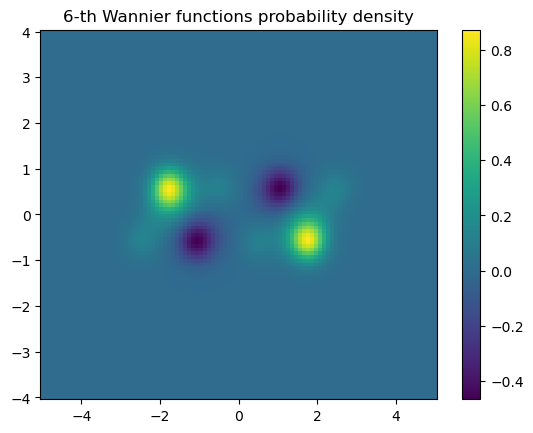

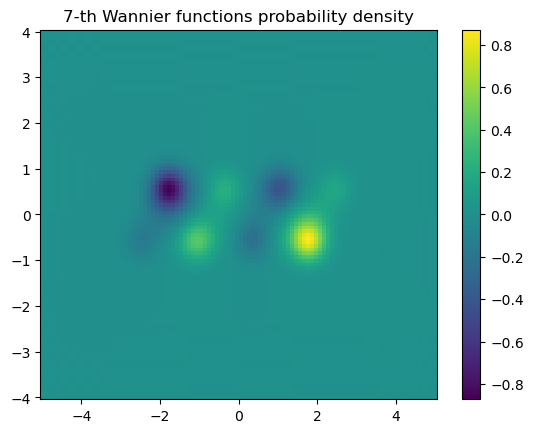

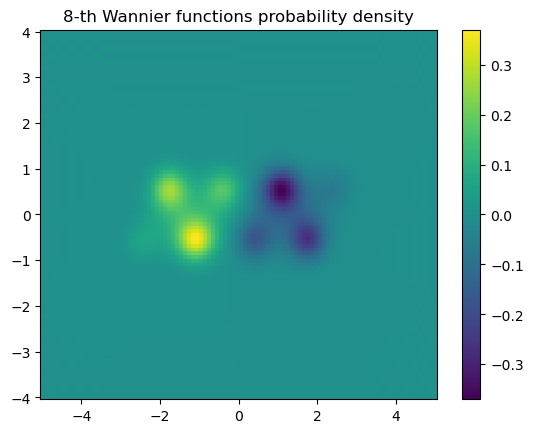

In [8]:
import matplotlib.colors as colors
from tools.fix_phase import fix_phase
import matplotlib.pyplot as plt
x = np.linspace(-5, 5, 100)
y = np.linspace(-4, 4, 100)
z = np.array([0])
X = np.meshgrid(x, y, indexing='ij')

for i in range(G.Nsite):
    Wx = fix_phase(
        psi((x, y, z), G.n, G.dx, W[i], p[i])[..., 0, 0], mode='svmd')
    plt.figure()
    plt.pcolormesh(*X, Wx)
    plt.colorbar()
    plt.title(f'{i+1}-th Wannier functions probability density')


The rotational parity is $1, -1, 1, -1, 1, 1, -1, -1$. It's not alternating.

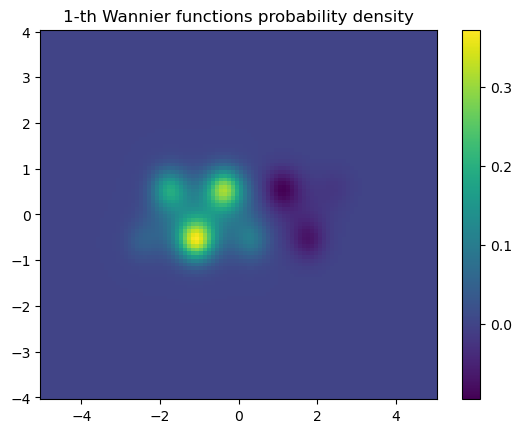

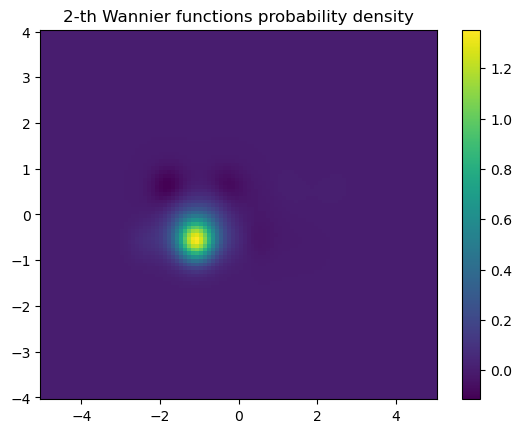

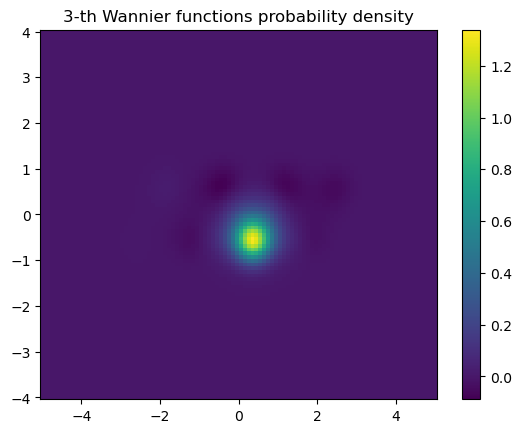

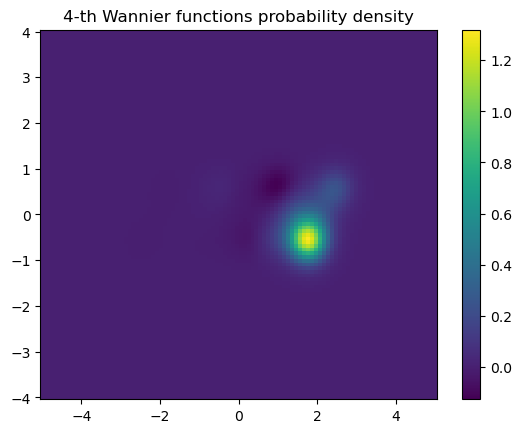

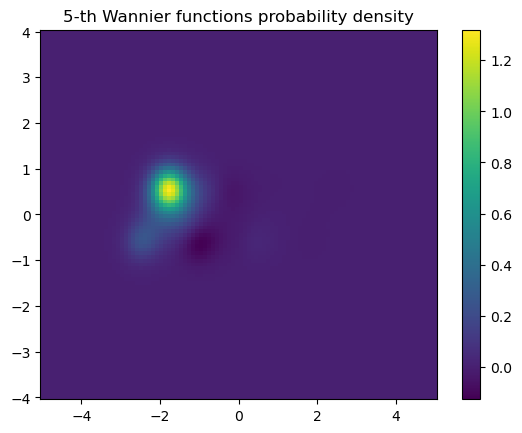

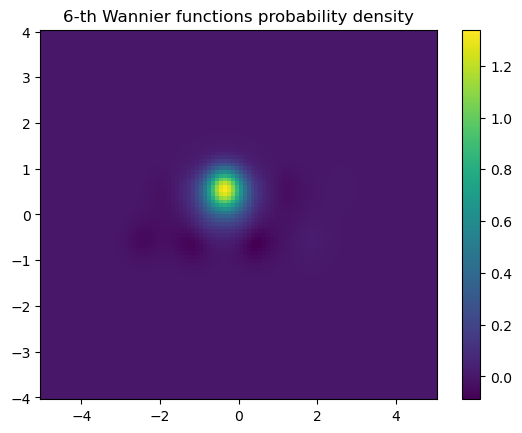

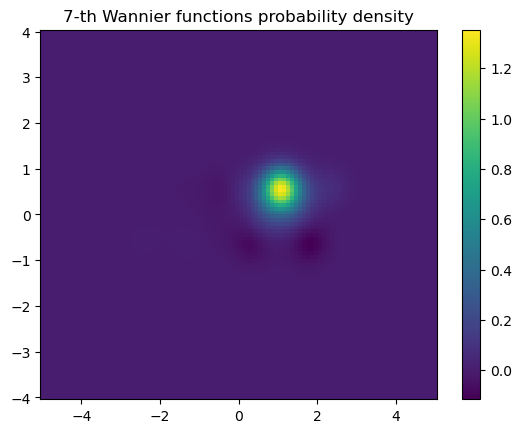

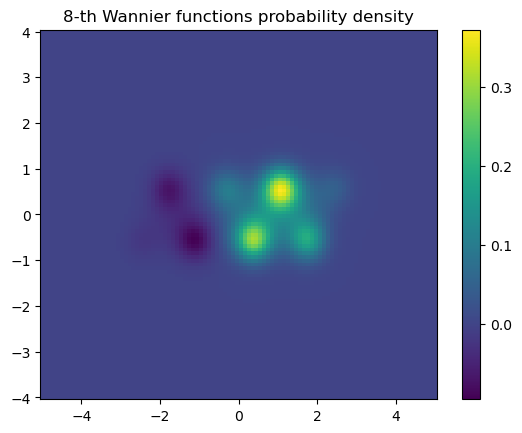

In [6]:
import matplotlib.colors as colors
from tools.fix_phase import fix_phase
import matplotlib.pyplot as plt
x = np.linspace(-5, 5, 100)
y = np.linspace(-4, 4, 100)
z = np.array([0])
wx = wannier_func((x, y, z), V, G, W, p)
X = np.meshgrid(x, y, indexing='ij')

for i in range(G.Nsite):
    Wx = fix_phase(wx[..., 0, i], mode='svmd')
    plt.figure()
    plt.pcolormesh(*X, Wx)
    plt.colorbar()
    plt.title(f'{i+1}-th Wannier functions probability density')


Wannier function inner products:

In [7]:
from scipy.integrate import simps, dblquad
x = np.linspace(-G.R0[0], G.R0[0], 500)
y = np.linspace(-G.R0[1], G.R0[1], 500)
z = np.linspace(-G.R0[2], G.R0[2], 500)


def intgrl3d(integrand: np.ndarray, x: list[np.ndarray, np.ndarray, np.ndarray]) -> float:
    for i in range(dim):
        if x[i].size > 1:
            integrand = simps(integrand, x[i], axis=0)
        else:
            integrand = integrand[0]
    return integrand


X = [x, y, z]
wf = wannier_func(G, W, V, p, X)
print(intgrl3d(wf[:, :, :, 0] * wf[:, :, :, 4], x=X))
print(intgrl3d(wf[:, :, :, 0] * wf[:, :, :, 1], x=X))
print(intgrl3d(wf[:, :, :, 3] * wf[:, :, :, 7], x=X))
print(intgrl3d(wf[:, :, :, 6] * wf[:, :, :, 7], x=X))


1.2160785868389173e-11
2.2466674545719604e-11
-1.2161183123382768e-11
-2.2464946438715224e-11


Wannier functions are orthogonal.

This is kind of expected, since given close spacing the traps at two edges are much shallower than those in the middle. So the low energy states are more centered in the middle, causing 2 WFs at the edges are not close to the site.

Solution: forcely equalize trap depths first?

### Equalize trap depths first?

Equalize trap depths is not enough, we need to make edge traps deeper to compensate the unevenness.

Triangular lattice size adjust to: [4 2]
Equalize: scale_factor is not a number. Set to None.
detV = -0.9999999999999991
V = [ 0.35212279 -0.16744702 -0.06577874 -0.11889701 -0.11889698 -0.06577881
 -0.16744702  0.3521228 ]
t = [0.41706326 0.26788027 0.33650308 0.51640933 0.73335154 0.33650308
 0.62944788 0.63141546 0.26788031 0.62944787 0.73335155 0.41706324
 0.51640934]
U = [1.52586893 1.03702796 1.10092663 1.2676079  1.26760791 1.10092662
 1.03702796 1.52586893]
V_err = 1.0322678579695805
t_err = 0.22176167481875317
U_err = 0.15326707078814175
V_off = [1.06015506 0.99870166 0.99961175 1.02919902 1.02919902 0.99961175
 0.99870166 1.06015506]


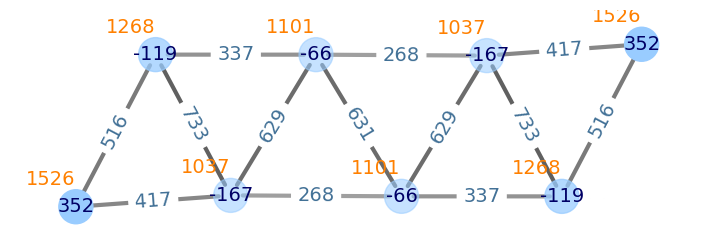

In [1]:
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 16
Lx = 4
Ly = 2
d = 3
shape = 'triangular'
w = None
eqt = 'neq'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([Lx, Ly], dtype=int),
                 trap=(73.0219, 1000),
                 lc=1450,
                 laser=780,
                 dim=d,
                 shape=shape,
                 waist=w,
                 equalize=False,
                 eqtarget=eqt,
                 sparse=True,
                 symmetry=True,
                 lattice_symmetry=False,
                 verbosity=0)
G.equalize_trap_depth()
eig_sol = G.eigen_basis()
E, W, p = eig_sol
E = E[0]
W = W[0]
p = p[0]
R = G.Xmat(W, p)

# In high dimension, X, Y, Z don't commute
# Convert list of ndarray to list of Tensor
solution = riemann_optimize(R)
V = site_order(G, solution, R)
G.wf_centers = np.array([np.diag(V.conj().T @ R[i] @V) / G.lc[i]
                       for i in range(G.lattice_dim)]).T
print('detV =', la.det(V))
G.A = V.conj().T @ (E[:, None] * V) * G.V0 / G.kHz_2p

# Shift onsite potential to zero average
G.A -= np.mean(np.real(np.diag(G.A))) * \
    np.eye(G.A.shape[0])
G.U = singleband_interaction(G, V, V, W, W, p, p)
G.draw_graph(A=G.A, U=G.U)

cv = np.sqrt(G.v_cost_func(G.A, None, None))
ct = np.sqrt(G.t_cost_func(G.A, None, None))
cu = np.sqrt(G.u_cost_func(G.U, None, None))
print(f'V = {np.diag(G.A)}')
print(f't = {abs(G.nn_tunneling(G.A))}')
print(f'U = {G.U}')
print(f'V_err = {cv}')
print(f't_err = {ct}')
print(f'U_err = {cu}')
print(f'V_off = {G.Voff}')

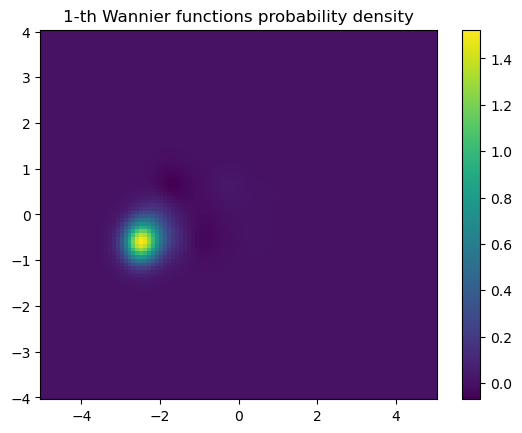

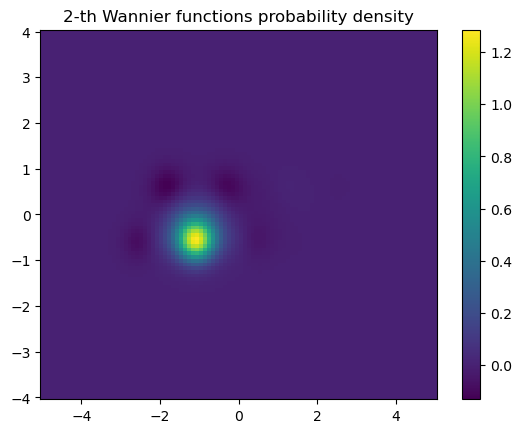

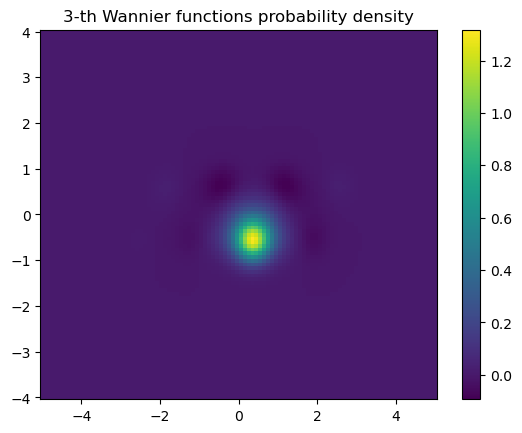

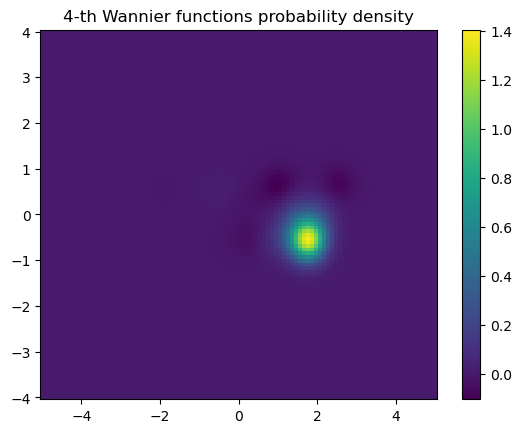

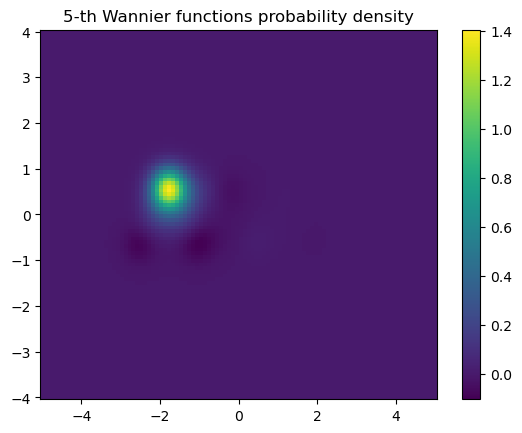

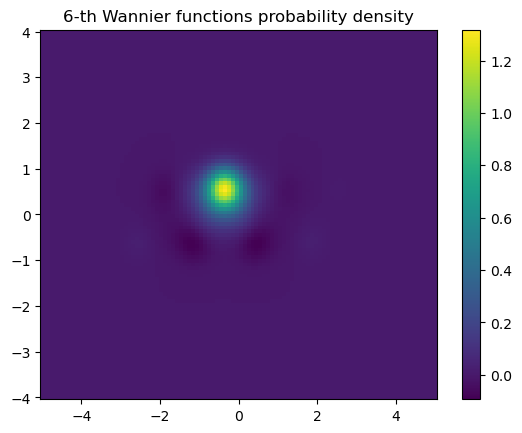

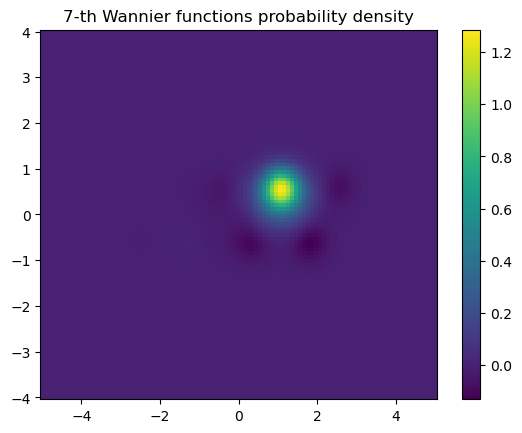

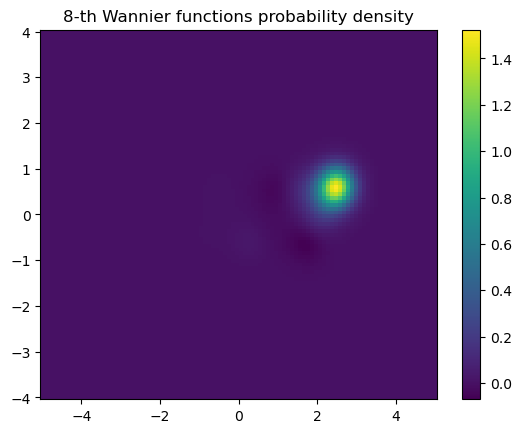

In [7]:
import matplotlib.colors as colors
from tools.fix_phase import fix_phase
import matplotlib.pyplot as plt
x = np.linspace(-5, 5, 100)
y = np.linspace(-4, 4, 100)
z = np.array([0])
wx = wannier_func((x, y, z), V, G, W, p)
X = np.meshgrid(x, y, indexing='ij')

for i in range(G.Nsite):
    Wx = fix_phase(wx[..., 0, i], mode='svmd')
    plt.figure()
    plt.pcolormesh(*X, Wx)
    plt.colorbar()
    plt.title(f'{i+1}-th Wannier functions probability density')


## Good geometries

### Larger spacing

DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=73.2kHz w=1000nm
Triangular lattice size adjust to: [4 2]
lattice: lattice shape is triangular
lattice: Full lattice sizes: [4 2]
lattice: lattice constants: [1.5        1.29903811]w
lattice: dx fixed to: [0.15 0.15 0.36]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[37 24 20] is set.
DVR: R0=[5.625      3.64951905 7.2       ]w is set.


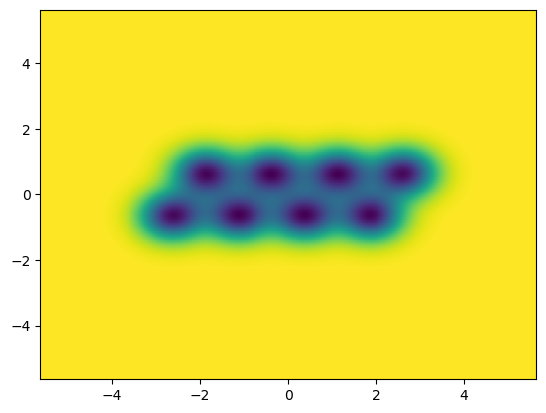

In [20]:
import matplotlib.pyplot as plt
from Hubbard.core import *
import numpy as np
from tools.fix_phase import fix_phase

N = 20
R0 = np.array([3, 3, 7.2])
G = MLWF(N,
         R0=R0,
         lattice=np.array([4, 2], dtype=int),
         lc=1500,
         trap=(73.2, 1000),
         band=1,
         dim=3,
         shape='triangular',
         sparse=True,
         symmetry=True,
         lattice_symmetry=False)

x = np.linspace(-G.R0[0], G.R0[0], 500)
X = np.meshgrid(x, x)
V = G.Vfun(*X, 0)

plt.pcolormesh(*X, V)


Triangular lattice size adjust to: [4 2]
Equalize: scale_factor is not a number. Set to None.
detV = 1.0000000000000009
V = [ 1.51540321 -0.86639368 -0.87240957  0.22339997  0.22340004 -0.87240957
 -0.86639362  1.51540321]
V = [ 1.51540321 -0.86639368 -0.87240957  0.22339997  0.22340004 -0.87240957
 -0.86639362  1.51540321]
t = [0.19000773 0.14125423 0.1661424  0.21721986 0.27849809 0.16614237
 0.24931639 0.2515871  0.14125423 0.24931637 0.27849822 0.19000771
 0.21721989]
U = [1.61381218 1.39657658 1.39823367 1.47396015 1.47396017 1.39823367
 1.3965766  1.61381217]
V_err = 4.910505874989992
t_err = 0.15200477226060885
U_err = 0.0600895741654447


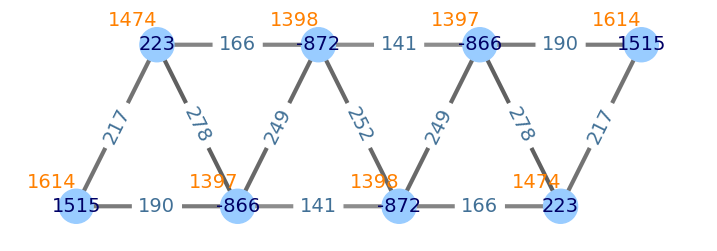

In [33]:
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 16
Lx = 4
Ly = 2
d = 3
shape = 'triangular'
w = None
eqt = 'neq'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([Lx, Ly], dtype=int),
                 trap=(73.0219, 1000),
                 lc=1550,
                 laser=780,
                 dim=d,
                 shape=shape,
                 waist=w,
                 equalize=False,
                 eqtarget=eqt,
                 sparse=True,
                 symmetry=True,
                 lattice_symmetry=False,
                 verbosity=0)
eig_sol = G.eigen_basis()
E, W, p = eig_sol
E = E[0]
W = W[0]
p = p[0]
R = G.Xmat(W, p)

# In high dimension, X, Y, Z don't commute
# Convert list of ndarray to list of Tensor
solution = riemann_optimize(R)
V = site_order(G, solution, R)
print('detV =', la.det(V))
G.A = V.conj().T @ (E[:, None] * V) * G.V0 / G.kHz_2p

# Shift onsite potential to zero average
G.A -= np.mean(np.real(np.diag(G.A))) * \
    np.eye(G.A.shape[0])
G.U = singleband_interaction(G, V, V, W, W, p, p)
G.draw_graph(A=G.A, U=G.U)

print(f'V = {np.diag(G.A)}')
cv = np.sqrt(G.v_cost_func(G.A, None, None))
ct = np.sqrt(G.t_cost_func(G.A, None, None))
cu = np.sqrt(G.u_cost_func(G.U, None, None))
print(f'V = {np.diag(G.A)}')
print(f't = {abs(G.nn_tunneling(G.A))}')
print(f'U = {G.U}')
print(f'V_err = {cv}')
print(f't_err = {ct}')
print(f'U_err = {cu}')


In [34]:
import matplotlib.colors as colors
from tools.fix_phase import fix_phase
import matplotlib.pyplot as plt
x = np.linspace(-5, 5, 100)
y = np.linspace(-4, 4, 100)
z = np.array([0])
wx = wannier_func(G, W, V, p, (x, y, z))


Wx = np.sum(np.reshape(wx, (*wx.shape[:2], G.Nsite))**2, axis=2)
X = np.meshgrid(x, y, indexing='ij')
plt.pcolormesh(*X, Wx, vmin=1e-2, vmax=3.4)
plt.colorbar()
plt.title('8 Wannier functions total probability density')


TypeError: 'HubbardGraph' object is not subscriptable

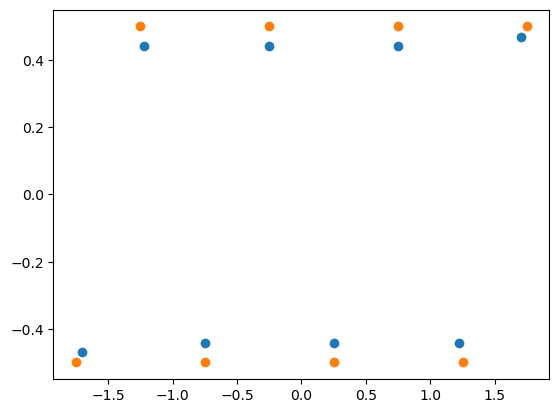

In [ ]:
x = np.array([np.diag(V.T @ R[i] @ V) / G.lc[i]
              for i in range(G.lattice_dim)]).T

plt.plot(x[:, 0], x[:, 1], 'o')
plt.plot(G.trap_centers[:, 0], G.trap_centers[:, 1], 'o')


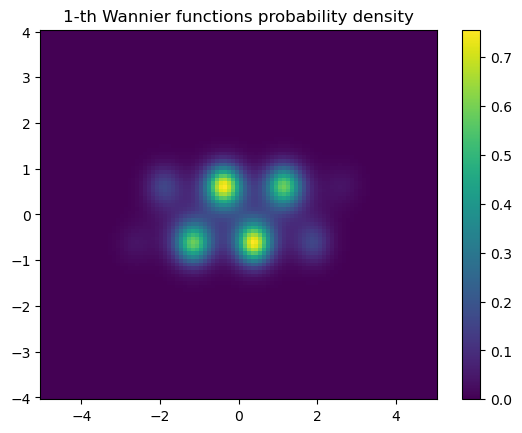

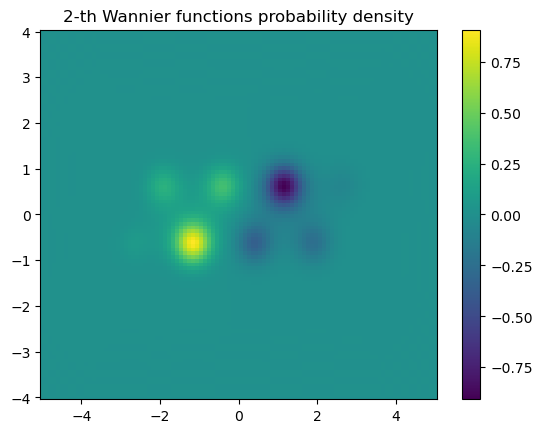

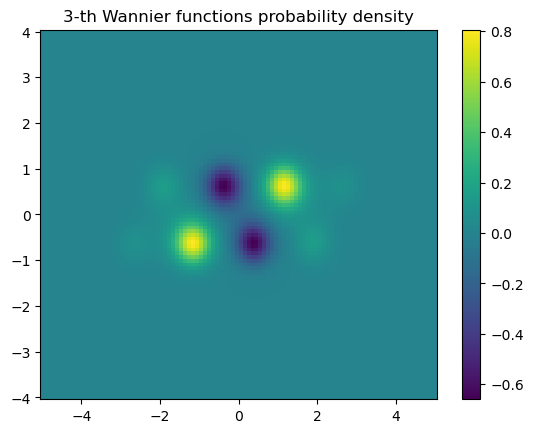

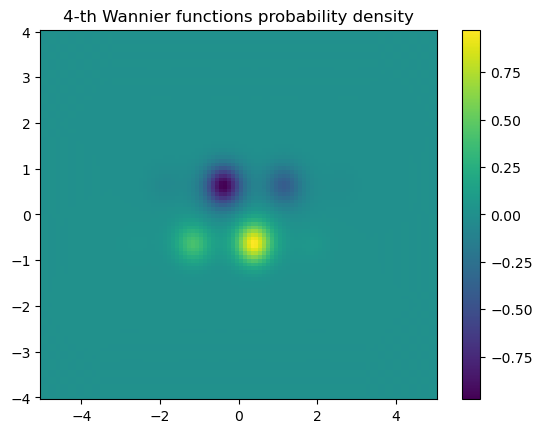

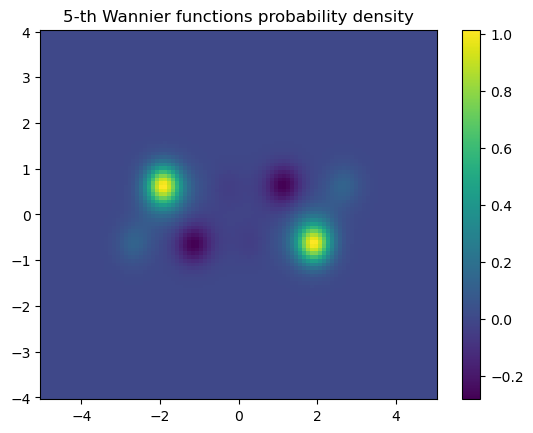

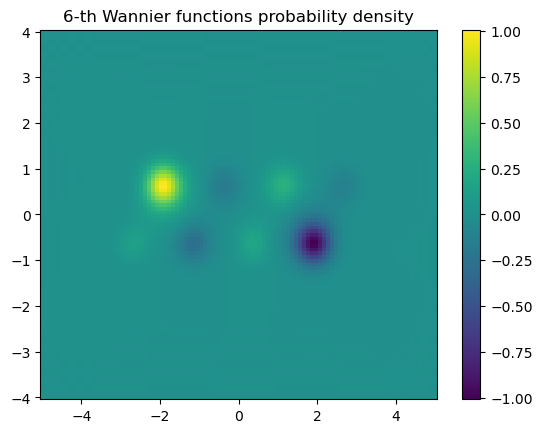

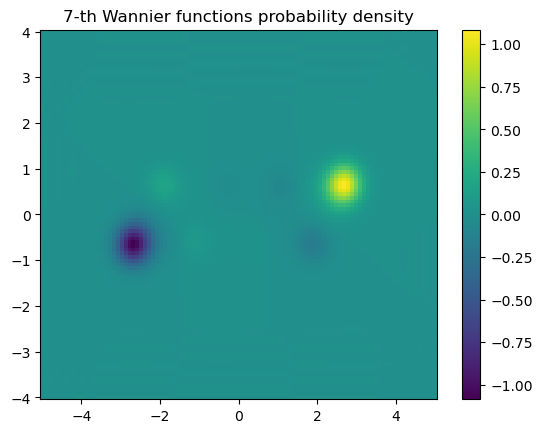

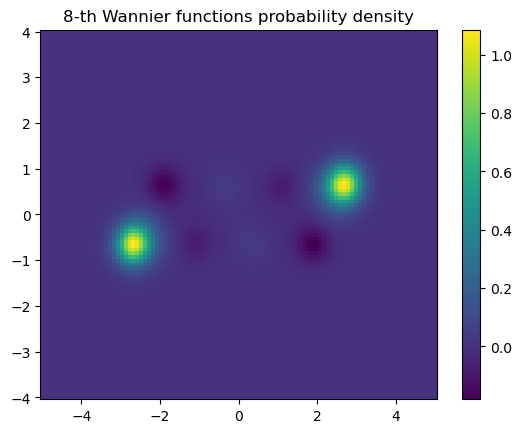

In [ ]:
import matplotlib.colors as colors
from tools.fix_phase import fix_phase
import matplotlib.pyplot as plt
x = np.linspace(-5, 5, 100)
y = np.linspace(-4, 4, 100)
z = np.array([0])
X = np.meshgrid(x, y, indexing='ij')

for i in range(G.Nsite):
    Wx = fix_phase(
        psi((x, y, z), G.n, G.dx, W[i], p[i])[..., 0, 0], mode='svmd')
    plt.figure()
    plt.pcolormesh(*X, Wx)
    plt.colorbar()
    plt.title(f'{i+1}-th Wannier functions probability density')


Parity is $1, -1, 1, -1, 1, -1, -1, 1$. There's also non-alternating pair. What's the difference?

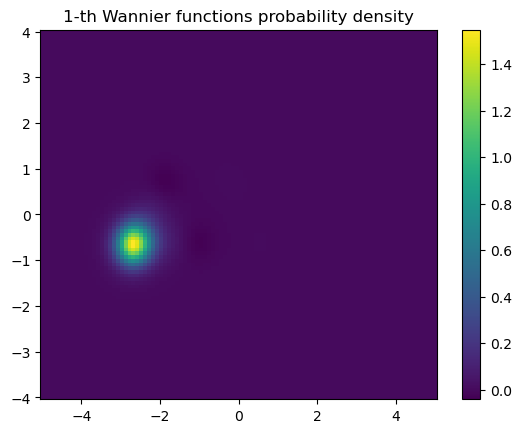

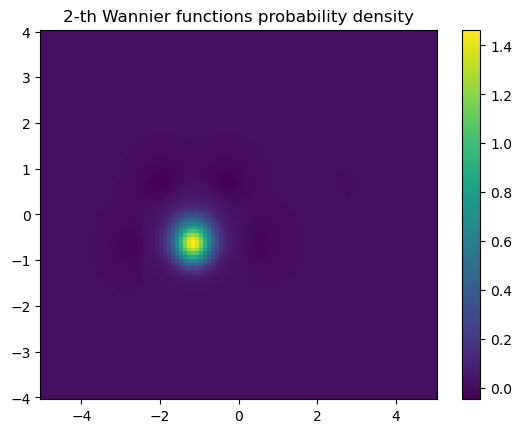

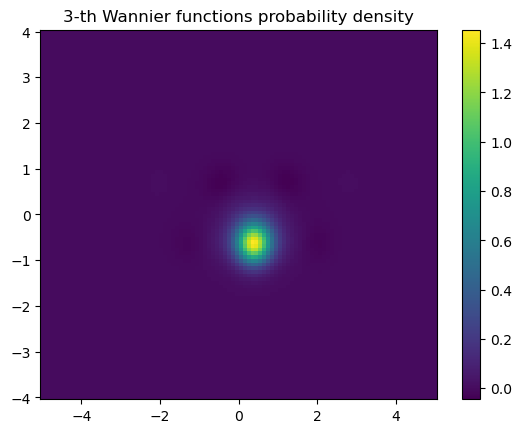

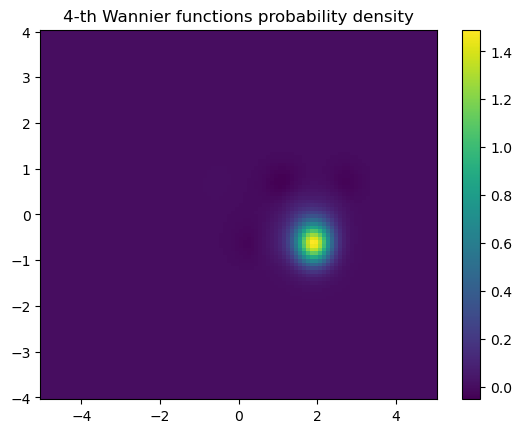

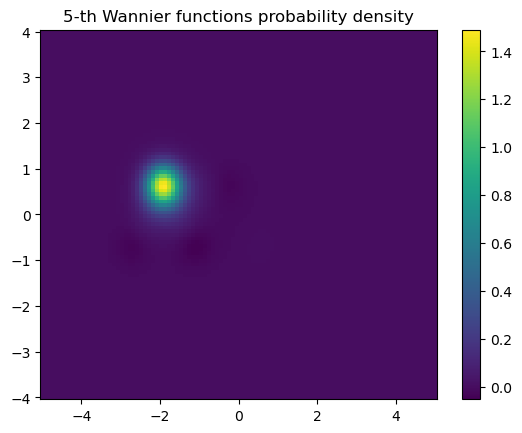

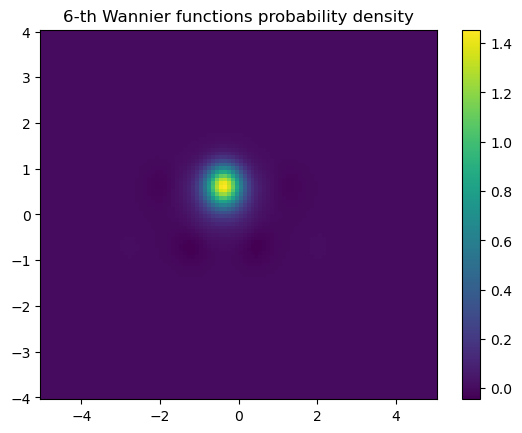

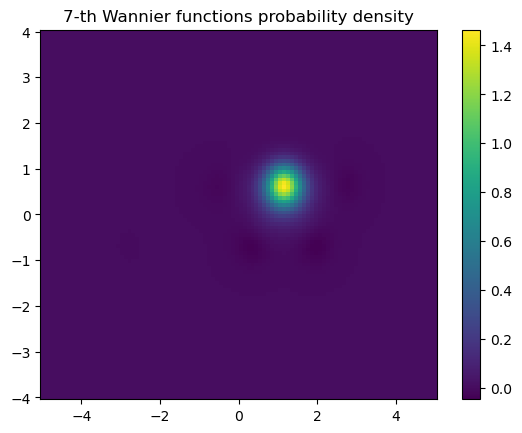

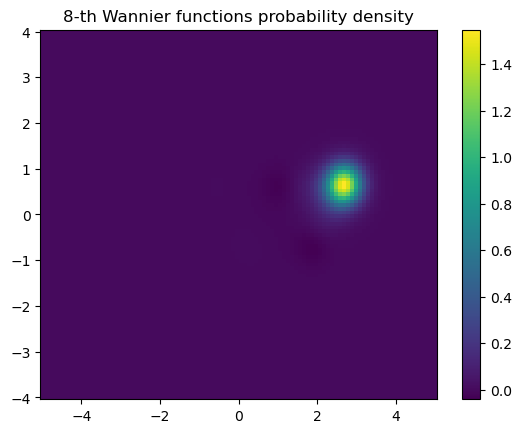

In [ ]:
import matplotlib.colors as colors
from tools.fix_phase import fix_phase
import matplotlib.pyplot as plt
x = np.linspace(-5, 5, 100)
y = np.linspace(-4, 4, 100)
z = np.array([0])
wx = wannier_func((x, y, z), V, G, W, p)
X = np.meshgrid(x, y, indexing='ij')

for i in range(G.Nsite):
    Wx = fix_phase(wx[..., 0, i], mode='svmd')
    plt.figure()
    plt.pcolormesh(*X, Wx)
    plt.colorbar()
    plt.title(f'{i+1}-th Wannier functions probability density')


### Hexagon

DVR: dx=[0.1875 0.1875 0.45  ]w is set.
DVR: n=[16 16 16] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=73.0219kHz w=1000nm
Triangular lattice size adjust to: [3 3]
lattice: lattice shape is triangular
lattice: Full lattice sizes: [3 3]
lattice: lattice constants: [1.55       1.34233938]w
lattice: dx fixed to: [0.1875 0.1875 0.45  ]w
DVR: dx=[0.1875 0.1875 0.45  ]w is set.
DVR: n=[24 23 16] is set.
DVR: R0=[4.55       4.34233938 7.2       ]w is set.
Equalize: scale_factor is not a number. Set to None.
H_op: n=[24 23 16] dx=[0.1875 0.1875 0.45  ]w p=[1 1 1] Gaussian sparse diagonalization starts. Lowest 7 states are to be calculated.
H_op: n=[24 23 16] dx=[0.1875 0.1875 0.45  ]w p=[1 1 1] Gaussian operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.39s.
H_solver: eigenstates memory usage:  0.54 MiB.
H_op: n=[24 23 16] dx=[0.1875 0.1875 0.45  ]w p=[ 1 -1 

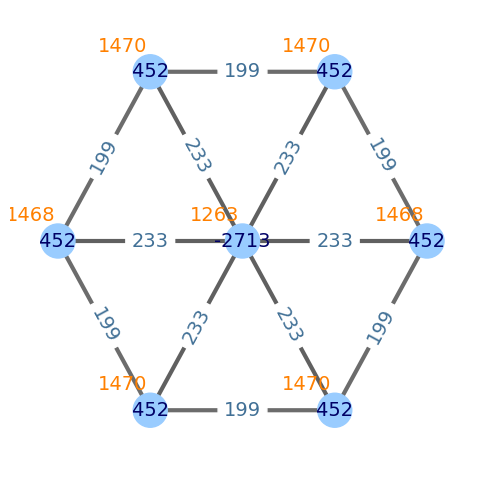

In [ ]:
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 16
Lx = 3
Ly = 3
d = 3
shape = 'triangular'
w = None
eqt = 'neq'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([Lx, Ly], dtype=int),
                 trap=(73.0219, 1000),
                 lc=1550,
                 laser=780,
                 dim=d,
                 shape=shape,
                 waist=w,
                 equalize=False,
                 eqtarget=eqt,
                 sparse=True,
                 symmetry=True,
                 lattice_symmetry=True,
                 verbosity=3)
eig_sol = G.eigen_basis()
E, W, p = eig_sol
E = E[0]
W = W[0]
p = p[0]
R = G.Xmat(W, p)

# In high dimension, X, Y, Z don't commute
# Convert list of ndarray to list of Tensor
solution = riemann_optimize(R)
V = site_order(G, solution, R)

G.A = V.conj().T @ (E[:, None] * V) * G.V0 / G.kHz_2p

# Shift onsite potential to zero average
G.A -= np.mean(np.real(np.diag(G.A))) * \
    np.eye(G.A.shape[0])
G.U = singleband_interaction(G, V, V, W, W, p, p)
G.draw_graph(A=G.A, U=G.U)

print(f'V = {np.diag(G.A)}')
cv = np.sqrt(G.v_cost_func(G.A, None, None))
ct = np.sqrt(G.t_cost_func(G.A, None, None))
cu = np.sqrt(G.u_cost_func(G.U, None, None))
print(f'V = {np.diag(G.A)}')
print(f't = {abs(G.nn_tunneling(G.A))}')
print(f'U = {G.U}')
print(f'V_err = {cv}')
print(f't_err = {ct}')
print(f'U_err = {cu}')


Text(0.5, 1.0, '8 Wannier functions total probability density')

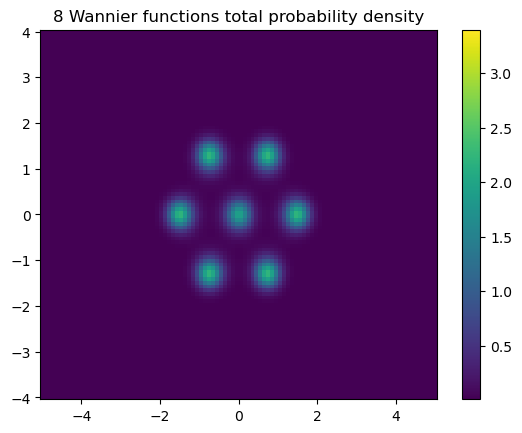

In [ ]:
import matplotlib.colors as colors
from tools.fix_phase import fix_phase
import matplotlib.pyplot as plt
x = np.linspace(-5, 5, 100)
y = np.linspace(-4, 4, 100)
z = np.array([0])
wx = wannier_func(G, W, V, p, (x, y, z))


Wx = np.sum(np.reshape(wx, (*wx.shape[:2], G.Nsite))**2, axis=2)
X = np.meshgrid(x, y, indexing='ij')
plt.pcolormesh(*X, Wx, vmin=1e-2, vmax=3.4)
plt.colorbar()
plt.title('8 Wannier functions total probability density')


DVR: dx=[0.1875 0.1875 0.45  ]w is set.
DVR: n=[16 16 16] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=73.0219kHz w=1000nm
Triangular lattice size adjust to: [6 2]
lattice: lattice shape is triangular
lattice: Full lattice sizes: [6 2]
lattice: lattice constants: [1.55       1.34233938]w
lattice: dx fixed to: [0.1875 0.1875 0.45  ]w
DVR: dx=[0.1875 0.1875 0.45  ]w is set.
DVR: n=[38 19 16] is set.
DVR: R0=[7.2625     3.67116969 7.2       ]w is set.
Equalize: scale_factor is not a number. Set to None.
H_op: n=[38 19 16] dx=[0.1875 0.1875 0.45  ]w p=[0 0 1] Gaussian sparse diagonalization starts. Lowest 12 states are to be calculated.
H_op: n=[38 19 16] dx=[0.1875 0.1875 0.45  ]w p=[0 0 1] Gaussian operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: Gaussian Hamiltonian solved. Time spent: 4.35s.
H_solver: eigenstates memory usage:  4.67 MiB.
Optimizing...
Iteration    Cost                       

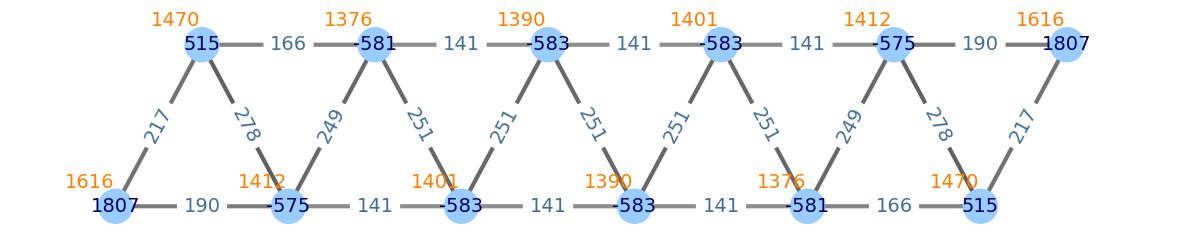

In [ ]:
from Hubbard.plot import *
import numpy as np
from Hubbard.output import *

N = 16
Lx = 6
Ly = 2
d = 3
shape = 'triangular'
w = None
eqt = 'neq'
R0 = np.array([3, 3, 7.2])
G = HubbardGraph(N,
                 R0=R0,
                 lattice=np.array([Lx, Ly], dtype=int),
                 trap=(73.0219, 1000),
                 lc=1550,
                 laser=780,
                 dim=d,
                 shape=shape,
                 waist=w,
                 equalize=False,
                 eqtarget=eqt,
                 sparse=True,
                 symmetry=True,
                 lattice_symmetry=False,
                 verbosity=3)
eig_sol = eigen_basis(G)
E, W, p = eig_sol
E = E[0]
W = W[0]
p = p[0]
R = Xmat(G, W, p)

# In high dimension, X, Y, Z don't commute
# Convert list of ndarray to list of Tensor
R = [torch.from_numpy(Ri) for Ri in R]
solution = riemann_optimize(G, None, R)
V = site_order(G, solution, R)

G.A = V.conj().T @ (E[:, None] * V) * G.V0 / G.kHz_2p

# Shift onsite potential to zero average
G.A -= np.mean(np.real(np.diag(G.A))) * \
    np.eye(G.A.shape[0])
G.U = singleband_interaction(G, V, V, W, W, p, p)
G.draw_graph(A=G.A, U=G.U)

print(f'V = {np.diag(G.A)}')
cv = np.sqrt(G.v_cost_func(G.A, None, None))
ct = np.sqrt(G.t_cost_func(G.A, None, None))
cu = np.sqrt(G.u_cost_func(G.U, None, None))
print(f'V = {np.diag(G.A)}')
print(f't = {abs(G.nn_tunneling(G.A))}')
print(f'U = {G.U}')
print(f'V_err = {cv}')
print(f't_err = {ct}')
print(f'U_err = {cu}')
